In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rng = np.random.default_rng() 

In [4]:
N_homework = 17

ii = rng.integers(N_homework)+1

print(ii)

15


In [5]:
from scipy.stats import poisson
# Poisson, average number of goals per soccer match nave = 2.5

# binomial for N--> inf and p*N = n expected = constant


nave = 2.5
ngoals = 

# attention, goals are not independent events, so -- in principle -- a poission distribution might not be the 
# correct description!! 



SyntaxError: invalid syntax (892878470.py, line 8)

(20000,)


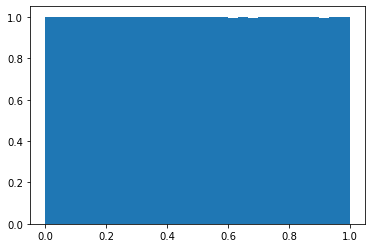

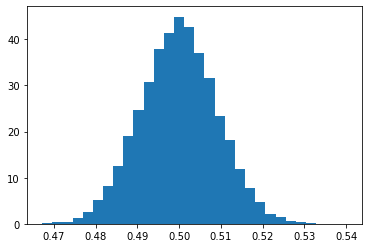

In [6]:
# lets make a numerical experiment

# how is the mean of N uniform random variable distributed?
N = 1000
reps = 20000 # many repetitions

# N times reps random uniform variables
x = rng.uniform(size=(N, reps))

plt.figure()
_ = plt.hist(x.flatten(), density=True, bins=30)

# compute the mean along the first dimension
u = np.mean(x, axis=0)

# give reps random variables
print(u.shape)

plt.figure()
_ = plt.hist(u, density=True, bins=30)

(20000,)


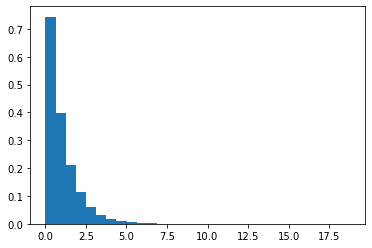

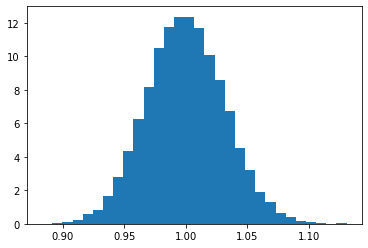

In [7]:
# oke, lets try with another distribution

N = 1000
reps = 20000 # many repetitions

# N times reps random exponential variables
x = rng.exponential(size=(N, reps))

plt.figure()
_ = plt.hist(x.flatten(), density=True, bins=30)

# compute the mean along the first dimension
u = np.mean(x, axis=0)

# give reps random variables
print(u.shape)

plt.figure()
_ = plt.hist(u, density=True, bins=30)

(20000,)


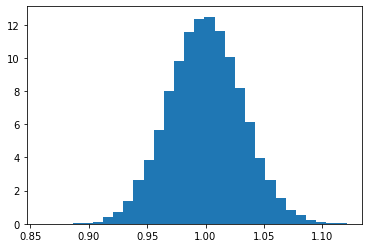

In [8]:
N = 1000
reps = 20000 # many repetitions

# N times reps random exponential variables
x = rng.exponential(size=(N, reps))

# compute the mean along the first dimension
u = np.mean(x, axis=0)

# give reps random variables
print(u.shape)

plt.figure()
_ = plt.hist(u, density=True, bins=30)

(20000,)


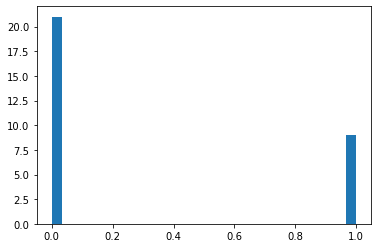

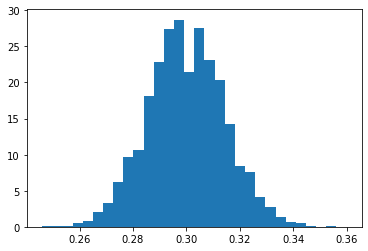

In [9]:
# oke, lets try with another distribution

N = 1000
reps = 20000 # many repetitions

# N times reps random exponential variables
x = rng.binomial(size=(N, reps), n=1, p=0.3)

plt.figure()
_ = plt.hist(x.flatten(), density=True, bins=30)

# compute the mean along the first dimension
u = np.mean(x, axis=0)

# give reps random variables
print(u.shape)

plt.figure()
_ = plt.hist(u, density=True, bins=30)


[   1    2    4    8   16   32   64  128  256  512 1024 2048]


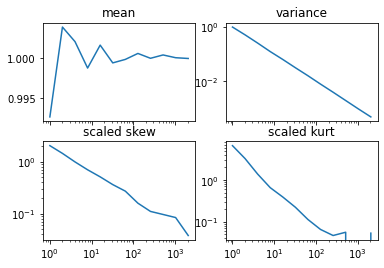

In [15]:
from scipy.stats import skew, kurtosis

### Lets check how the moments of the u go as a function of N

Ns = 2**np.arange(12)
print(Ns)

mean_u = np.zeros(len(Ns))
var_u = np.zeros(len(Ns))
skw_u = np.zeros(len(Ns))
kurt_u = np.zeros(len(Ns))

for i in range(len(Ns)):
    x = rng.exponential(size=(Ns[i], reps))    #### I want to explain this part :
    u = np.mean(x, axis=0)
    
    mean_u[i] = np.mean(u)
    var_u[i] = np.var(u)
    skw_u[i] = skew(u)
    kurt_u[i] = kurtosis(u)
    
fix, axes = plt.subplots(2,2, sharex=True)

axes[0,0].set_title('mean')
axes[0,0].plot(Ns, mean_u)
axes[0,0].set_xscale('log')

axes[0,1].set_title('variance')
axes[0,1].plot(Ns, var_u)
axes[0,1].set_yscale('log')

axes[1,0].set_title('scaled skew')
axes[1,0].plot(Ns, skw_u)
axes[1,0].set_yscale('log')

axes[1,1].set_title('scaled kurt')
axes[1,1].plot(Ns, kurt_u)
axes[1,1].set_yscale('log')

(20000,)


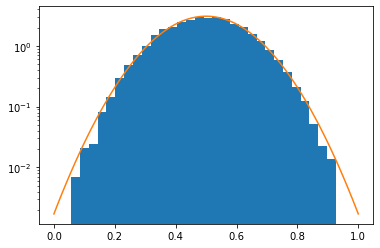

In [10]:
reps = 20000
N = 5

x = rng.uniform(size=(N, reps))

# compute the mean along the first dimension
u = np.mean(x, axis=0)

# give reps random variables
print(u.shape)

plt.figure()
_ = plt.hist(u, density=True, bins=30)

# mean of a uniform distribution
mu = 0.5
var = 1/12

xx = np.linspace(0., 1, num=100)
var_u = var/N

pdf = 1./np.sqrt(2*np.pi*var_u) * np.exp(-0.5*(xx-mu)**2 / var_u )

plt.plot(xx, pdf)
# to highlight the behaviour in the tails, let take log-y
plt.yscale('log')

In [11]:
# HOMEWORK
# compute mean and variance for the exponential and 
# the Poisson distribution. 
# Show that you can predict the distribution of u also for them.
# by overplotting the pdf of u over the histogram of u

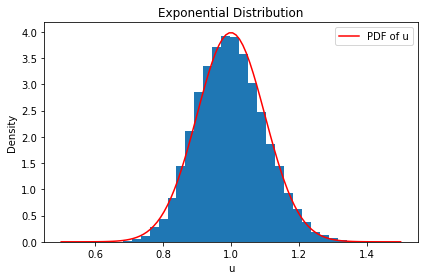

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, poisson

reps = 20000  
N = 100    

rng = np.random.default_rng()
lambda_exp = 1
x_exp = rng.exponential(size=(N, reps))

u_exp = np.mean(x_exp, axis=0)

mu_exp = 1 / lambda_exp
var_exp = 1 / (lambda_exp ** 2)
var_u_exp = var_exp / N

_ = plt.hist(u_exp, density=True, bins=30)
xx_exp = np.linspace(.5, 1.5, num=100)
pdf_exp = 1 / np.sqrt(2 * np.pi * var_u_exp) * np.exp(-0.5 * (xx_exp - mu_exp) ** 2 / var_u_exp)
plt.plot(xx_exp, pdf_exp, 'r-', label='PDF of u')

plt.title("Exponential Distribution")
plt.xlabel("u")
plt.ylabel("Density")
plt.legend()
plt.legend()
plt.tight_layout()
plt.show()


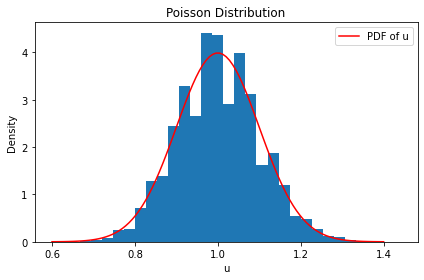

In [13]:
lambda_pois = 1
x_pois = rng.poisson(size=(N, reps))
u_pois = np.mean(x_pois, axis=0)
mu_pois = lambda_pois
var_pois = lambda_pois
var_u_pois = var_pois / N

_ = plt.hist(u_pois, density=True, bins=30)

xx_pois = np.linspace(.6, 1.4, num=100)
pdf_pois = 1. / np.sqrt(2 * np.pi * var_u_pois) * np.exp(-0.5 * (xx_pois - mu_pois) ** 2 / var_u_pois)
plt.plot(xx_pois, pdf_pois, 'r-', label='PDF of u')


plt.title("Poisson Distribution")
plt.xlabel("u")
plt.ylabel("Density")
plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# ADVANCED HOMEWORK
# show numerically that for a Cauchy distribution, 
# the central limit theorem does not hold. 
# (Theoretical part) Find out why? 
# Visualize the reason in a nice plot!
# Hint: Which condition does the parent distribution have to fullfill, 
# so that the central limit theorem is valid?
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html
# what distribution do the means of a Cauchy variates take? 
# -- explore it numerical

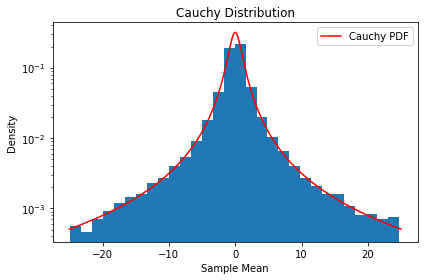

In [18]:
from scipy.stats import cauchy
reps = 20000  
N = 100      

rng = np.random.default_rng()
x_cauchy = rng.standard_cauchy(size=(N, reps))

u_cauchy = np.mean(x_cauchy, axis=0)
u_cauchy = u_cauchy[(u_cauchy>-25) & (u_cauchy<25)]
_ = plt.hist(u_cauchy, bins=30, density=True)

xx = np.linspace(-25, 25, num=10000)

# we don't have mean and var for Cauchy distribution so we can't use normal distribution for compare
# so I used Cauchy distribution for compare.

pdf_cauchy = cauchy.pdf(xx)
plt.plot(xx, pdf_cauchy, 'r-', label="Cauchy PDF")


plt.title("Cauchy Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.yscale('log')  
plt.legend()
plt.tight_layout()
plt.show()



In [2]:
# consider a large (contant) number of people passing in front of 
# a shop every minute, 
# and a small fraction of them deciding to visit the shop. 
# Let lambda be the rate of success for "going into the shop"

# the time between subsequent shop visitors will be 
# exponentially distributed.

# lets simulate how many people come into the shop in a time T

lam = 0.2
T = 20

def sim_visitors(lam, T):
    
    counter = 0
    time_passed = 0
    wait_times = [] # initialized as empty list
    
    while True:
        wait_time = rng.exponential(scale=1./lam)
        time_passed += wait_time
        wait_times.append(wait_time)
        counter += 1
        if time_passed>T:
            counter -= 1 # the last person came in after time T 
            break
    return counter, wait_times

In [132]:
reps = 5000

Ns = np.zeros(reps)
WT = []

for i in range(reps):
    Ns[i], wait_times = sim_visitors(lam, T)
    WT = WT + wait_times

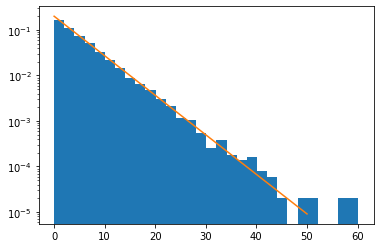

In [133]:
_ = plt.hist(WT, bins=30, density=True)
xx = np.linspace(0, 50, num=100)
plt.plot(xx, lam*np.exp(-lam*xx))
plt.yscale('log')

4.0


/var/folders/f7/d8mdhzsd6ygcs4zmj_l64ywm0000gp/T/ipykernel_4175/4068079420.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  fact_n = np.array([np.math.factorial(int(x)) for x in n])


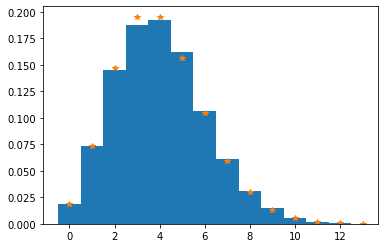

In [134]:
n = np.arange(0, np.amax(Ns)+1)

_ = plt.hist(Ns, bins=n-0.5, density=True)

fact_n = np.array([np.math.factorial(int(x)) for x in n])

n_ave = lam*T
print(n_ave)

pmf = n_ave**n * np.exp(-n_ave) / fact_n

plt.plot(n, pmf, '*')

1.0141885699585145


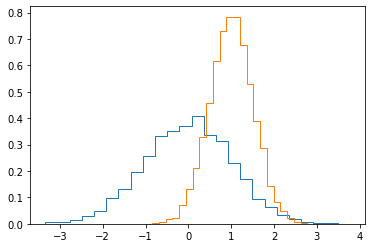

In [135]:
# how to draw from a Gaussian

x = rng.normal(size=10000)

_ = plt.hist(x, density=True, histtype='step', bins=25)

print(np.var(x))

x = 1 + 0.5*rng.normal(size=10000)

_ = plt.hist(x, density=True, histtype='step', bins=25)

(3000, 1)
(3000, 1, 1)


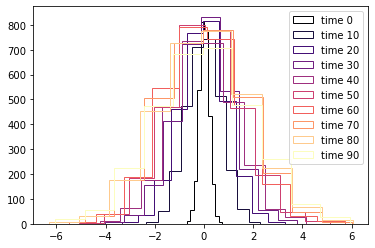

In [136]:
# toward Monte Carlo simulations

# example 1: 1d brownian motion
# brownian motion is a random walk whose increments are drawn 
# from a Gaussian.

Ntime = 100
Nparticles = 3000

start = np.zeros((Nparticles, 1))

sigma = 0.2

increments = sigma*rng.normal(size=(Nparticles, Ntime))

print(start.shape)
print(start[:, None].shape)
position = start + np.cumsum(increments, axis=1)

thin = 10
colors = plt.cm.magma(np.linspace(0,1, Ntime//thin))
for i in range(Ntime//thin):
    _ = plt.hist(position[:, thin*i], histtype='step', 
                 color=colors[i], label='time %i'%(thin*i) )
plt.legend(loc='best')


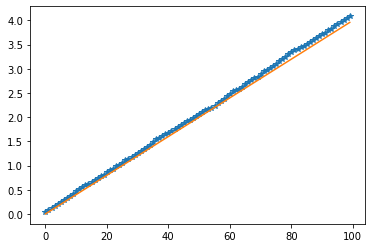

In [137]:
# compute the variance as a function of time


variance = np.var(position, axis=0)

t = np.arange(Ntime)

plt.plot(t, variance, '*')
plt.plot(t, sigma**2*t)



# it was a major finding from Albert Einstein, as it demonstrated that Brownian motion could
# describe the effect of diffusion on a gas density.
# in final consequence, this means that diffusion is the result of the microscopic particles.
# this was the final victory for the Atomist model, against the last proponents that matter was continuous!!

In [138]:
reps = 5000

Ns = np.zeros(reps)
WT = []



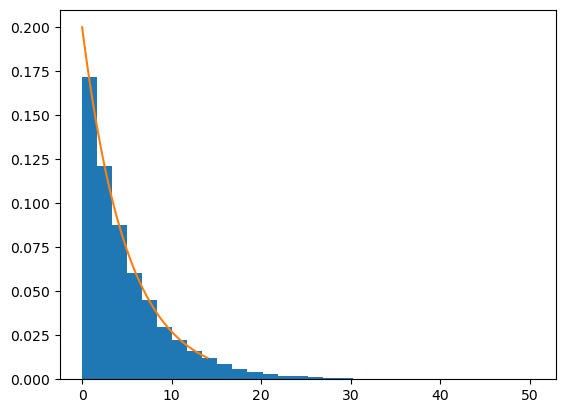

In [48]:
# by design the distribution of waiting times in exponential



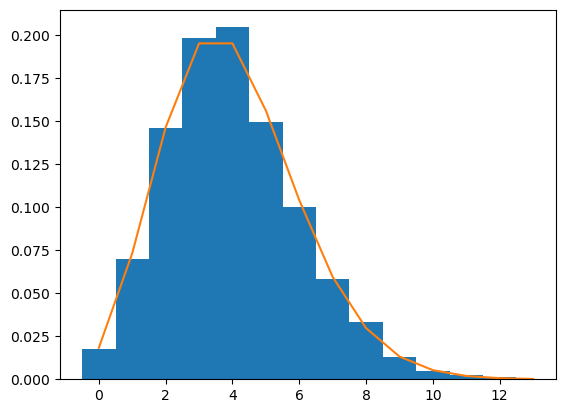

In [49]:
# success in infinitely many trials with expected number of 
# positive trials nave=lambda T --> Poisson distribution
